In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras import models, layers
import tensorflow.keras.datasets as tfds

In [2]:
# MNIST
inp = layers.Input(shape=(28, 28))
x = layers.Flatten()(inp)
x = layers.Dense(128, activation=keras.activations.relu)(x)
x = layers.Dense(10, activation=keras.activations.softmax)(x)
model = models.Model(inputs=inp, outputs=x)

(x_train, y_train), (x_test, y_test) = tfds.mnist.load_data()
x_train = x_train / 255.
x_test  = x_test / 255.
# y_train = keras.utils.to_categorical(y_train)
# y_test  = keras.utils.to_categorical(y_test)

# model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=["acc"])

# or
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.sparse_categorical_crossentropy, metrics=["acc"])

model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test),
    validation_batch_size=32
)

Epoch 1/5
1875/1875 [==============================] - 36s 12ms/step - loss: 0.2554 - acc: 0.9276 - val_loss: 0.1380 - val_acc: 0.9570
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1132 - acc: 0.9657 - val_loss: 0.1043 - val_acc: 0.9667
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0778 - acc: 0.9770 - val_loss: 0.0733 - val_acc: 0.9776
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0597 - acc: 0.9814 - val_loss: 0.0792 - val_acc: 0.9758
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0466 - acc: 0.9852 - val_loss: 0.0748 - val_acc: 0.9767


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 128)          1152        ['input_2[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 128)          16512       ['dense_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 64)           8256        ['dense_3[0][0]']                
                                                                                            

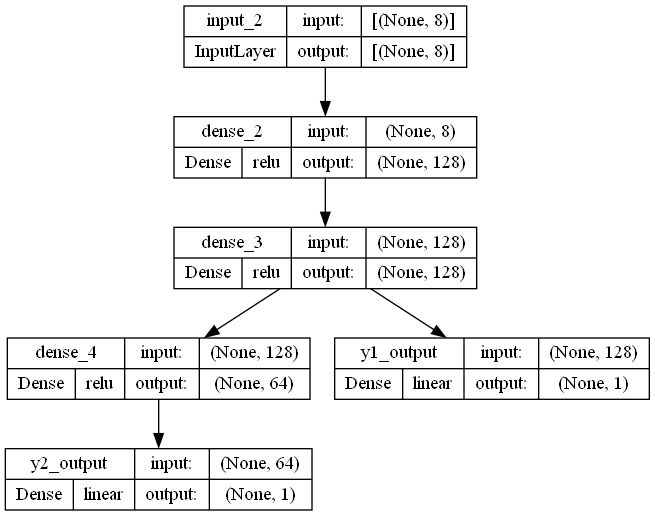

In [3]:
from keras.utils import plot_model


inp = layers.Input(shape=(8,))
dense1 = layers.Dense(128, activation=tf.nn.relu)(inp)
dense2 = layers.Dense(128, activation=tf.keras.activations.relu)(dense1)
y1_output = layers.Dense(1, name="y1_output")(dense2)
dense3 = layers.Dense(64, activation=tf.keras.activations.relu)(dense2)
y2_output = layers.Dense(1, name="y2_output")(dense3)
model = models.Model(inputs=inp, outputs=[y1_output, y2_output])

model.summary()

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
             loss={"y1_output": keras.losses.mse, "y2_output": keras.losses.mse},
             metrics={
                 "y1_output": tf.keras.metrics.RootMeanSquaredError(),
                 "y2_output": tf.keras.metrics.RootMeanSquaredError()})

plot_model(model, show_shapes=True, show_layer_activations=True)

(119980, 2, 28, 28) (119980,)


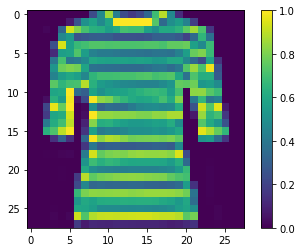

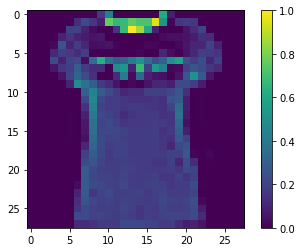

1.0
Epoch 1/20
938/938 [==============================] - 34s 21ms/step - loss: 0.1105 - val_loss: 0.0856
Epoch 2/20
938/938 [==============================] - 17s 18ms/step - loss: 0.0786 - val_loss: 0.0725
Epoch 3/20
938/938 [==============================] - 17s 18ms/step - loss: 0.0702 - val_loss: 0.0698
Epoch 4/20
938/938 [==============================] - 17s 18ms/step - loss: 0.0656 - val_loss: 0.0671
Epoch 5/20
938/938 [==============================] - 17s 18ms/step - loss: 0.0624 - val_loss: 0.0655
Epoch 6/20
938/938 [==============================] - 16s 18ms/step - loss: 0.0603 - val_loss: 0.0661
Epoch 7/20
938/938 [==============================] - 16s 17ms/step - loss: 0.0583 - val_loss: 0.0639
Epoch 8/20
938/938 [==============================] - 17s 18ms/step - loss: 0.0571 - val_loss: 0.0649
Epoch 9/20
938/938 [==============================] - 17s 19ms/step - loss: 0.0562 - val_loss: 0.0672
Epoch 10/20
938/938 [==============================] - 17s 18ms/step - loss: 0

In [4]:
import random

def create_pairs(x, digit_indices):
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(10)]) - 1
    for d in range(10):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, 10)
            dn = (d + inc) % 10
            z1, z2 = digit_indices[dn][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
    return np.array(pairs), np.array(labels)

def create_pairs_on_set(images, labels):
    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    pairs, y = create_pairs(images, digit_indices)
    y = y.astype("float32")
    return pairs, y

(train_images, train_labels), (test_images, test_labels) = tfds.fashion_mnist.load_data()

train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images /= 255.0
test_images /= 255.0

tr_paires, tr_y = create_pairs_on_set(train_images, train_labels)
ts_paires, ts_y = create_pairs_on_set(test_images, test_labels)
print(tr_paires.shape, tr_y.shape)

def show_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

this_pair = 10
show_image(tr_paires[this_pair][0])
show_image(tr_paires[this_pair][1])
print(tr_y[this_pair])

def initialize_base_network():
    inp = layers.Input(shape=(28, 28, ))
    x = layers.Flatten()(inp)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(128, activation="relu")(x)
    return models.Model(inputs=inp, outputs=x)

def eculidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def ecul_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

base_network = initialize_base_network()
plot_model(base_network, show_shapes=True, show_layer_names=True)

input_a = layers.Input(shape=(28, 28, ), name="left_input")
input_b = layers.Input(shape=(28, 28, ), name="right_input")

vect_output_a = base_network(input_a)
vect_output_b = base_network(input_b)

output = layers.Lambda(eculidean_distance, output_shape=ecul_dist_output_shape, name="output_layer")([vect_output_a, vect_output_b])
model = models.Model(inputs=[input_a, input_b], outputs=output)

plot_model(model, show_shapes=True, show_layer_names=True)

def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

rms = keras.optimizers.RMSprop()
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=rms)
history = model.fit([tr_paires[:, 0], tr_paires[:, 1]], tr_y, epochs=20, batch_size=128, validation_data=([ts_paires[:, 0], ts_paires[:, 1]], ts_y))
loss = model.evaluate(x=[ts_paires[:, 0], ts_paires[:, 1]], y=ts_y)

In [5]:
class ContrastiveLoss(keras.losses.Loss):
    def __init__(self, marigin=0):
        super().__init__()
        self.marigin = marigin
    
    def call(self, y_true, y_pred):
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(self.margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

def my_relu(x):
    return K.maximum(0.5, x)

my_lambda1 = layers.Lambda(my_relu)
my_lambda2 = layers.Lambda(lambda x: K.abs(x))

In [6]:
tf.__version__

'2.9.1'

In [7]:
class SimpleDense(layers.Layer):

    def __init__(self, units=32):
        super(SimpleDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)

        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
            initial_value=b_init(shape=(self.units,), dtype='float32'),
            trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [8]:
my_dense = SimpleDense(units=1)

x = tf.ones((1, 1))
y = my_dense(x)

print(my_dense.variables)

[<tf.Variable 'simple_dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.06718021]], dtype=float32)>, <tf.Variable 'simple_dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [9]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float).reshape(6, 1)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)


my_layer = SimpleDense(units=1)
model = tf.keras.Sequential([my_layer])

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=500,verbose=0)

print(model.predict([10.0]))
print(my_layer.variables)

1/1 [==============================] - 0s 125ms/step
[[18.981731]]
[<tf.Variable 'simple_dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9973525]], dtype=float32)>, <tf.Variable 'simple_dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.9917917], dtype=float32)>]


In [11]:
class SimpleDense(layers.Layer):

    def __init__(self, units=32, activation=None):
        super(SimpleDense, self).__init__()
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)

        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
            initial_value=b_init(shape=(self.units,), dtype='float32'),
            trainable=True)

    def call(self, inputs):
        return self.activation(tf.matmul(inputs, self.w) + self.b)

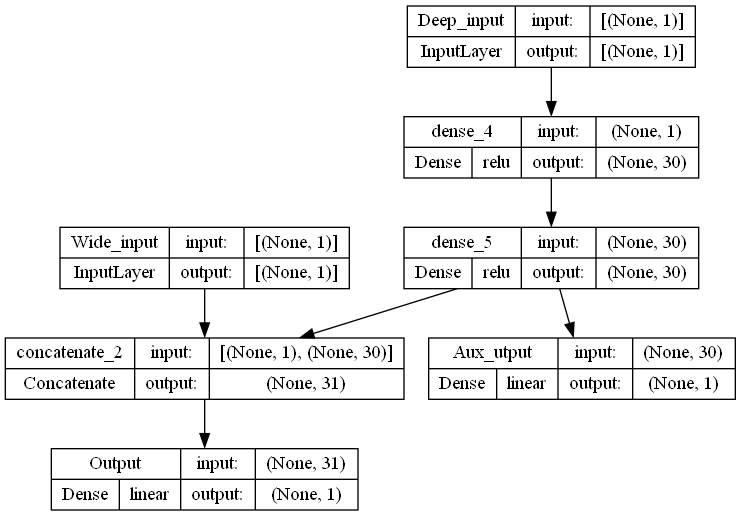

In [14]:
from keras.utils import plot_model

input_a = layers.Input(shape=[1], name="Wide_input")
input_b = layers.Input(shape=[1], name="Deep_input")

hidden_1 = layers.Dense(30, activation="relu")(input_b)
hidden_2 = layers.Dense(30, activation="relu")(hidden_1)
concat = layers.concatenate([input_a, hidden_2])

output = layers.Dense(1, name="Output")(concat)
aux_output = layers.Dense(1, name="Aux_utput")(hidden_2)

model = models.Model(inputs=[input_a, input_b],
                    outputs=[output, aux_output])

plot_model(model, show_shapes=True, show_layer_activations=True)

In [15]:
class WideAndDeepModel(models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super(WideAndDeepModel, self).__init__()
        self.hidden_1 = layers.Dense(units, activation=activation)
        self.hidden_2 = layers.Dense(units, activation=activation)
        self.main_output = layers.Dense(1)
        self.aux_output = layers.Dense(1)
    
    def call(self, inputs):
        input_a, input_b = inputs
        hidden1 = self.hidden_1(input_b)
        hidden2 = self.hidden_2(hidden1)
        concat = layers.concatenate([input_a, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [16]:
import datetime
import io

from PIL import Image
from IPython.display import Image as IPyImage
import imageio

In [20]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, activation='linear', input_dim=784))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

(x_train, y_train), (x_test, y_test) = tfds.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [21]:
plt.rc('font', size=20)
plt.rc('figure', figsize=(15, 3))

def display_digits(inputs, outputs, ground_truth, epoch, n=10):
    plt.clf()

    plt.yticks([])
    plt.grid(None)
    inputs = np.reshape(inputs, [n, 28, 28])
    inputs = np.swapaxes(inputs, 0, 1)
    inputs = np.reshape(inputs, [28, 28*n])
    plt.imshow(inputs)
    plt.xticks([28*x+14 for x in range(n)], outputs)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if outputs[i] == ground_truth[i]: 
            t.set_color('green') 
        else: 
            t.set_color('red')
    plt.grid(None)

GIF_PATH = './animation.gif'

In [22]:
class VisCallback(tf.keras.callbacks.Callback):
    def __init__(self, inputs, ground_truth, display_freq=10, n_samples=10):
        self.inputs = inputs
        self.ground_truth = ground_truth
        self.images = []
        self.display_freq = display_freq
        self.n_samples = n_samples

    def on_epoch_end(self, epoch, logs=None):
        # Randomly sample data
        indexes = np.random.choice(len(self.inputs), size=self.n_samples)
        X_test, y_test = self.inputs[indexes], self.ground_truth[indexes]
        predictions = np.argmax(self.model.predict(X_test), axis=1)

        # Plot the digits
        display_digits(X_test, predictions, y_test, epoch, n=self.display_freq)

        # Save the figure
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        image = Image.open(buf)
        self.images.append(np.array(image))

        # Display the digits every 'display_freq' number of epochs
        if epoch % self.display_freq == 0:
            plt.show()

    def on_train_end(self, logs=None):
        imageio.mimsave(GIF_PATH, self.images, fps=1)

C:\Program Files\Python38\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 61ms/step


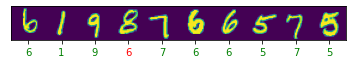

1/1 [==============================] - 0s 21ms/step


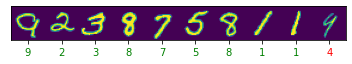

1/1 [==============================] - 0s 22ms/step


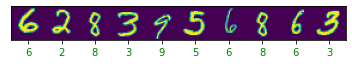

In [23]:
model = get_model()
model.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=0,
          callbacks=[VisCallback(x_test, y_test)])

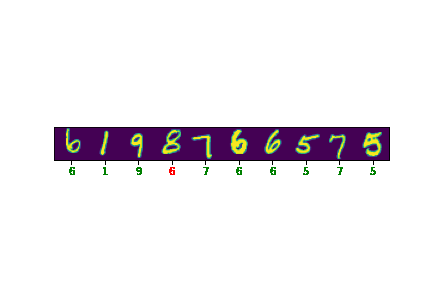

In [28]:
SCALE = 30

# FYI, the format is set to PNG here to bypass checks for acceptable embeddings
IPyImage(GIF_PATH, format='png', width=15 * SCALE, height=3 * SCALE) 